# Models Evaluation

In this step, we're using the test data (which the models have not seen during training) to evaluate the performance of the models. This includes both individual models and ensemble model.

The purpose of this step is to understand how well the models are likely to perform on unseen data in the future. It's a crucial part of the machine learning workflow because it helps you ensure that the models are not overfitting to the training data and are able to generalize well to new data.

## Table of Content

- Import Libraries
- import Functions
- Load Data
- Load Models
- Predict Individual Anomaly Detection Models on Test Data
- Ensemble Model
- Evaluate
  - Confusion Matrix
  - Classification Report
  - Metrics
  - Anomaly Analysis
- Analysis and Evaluation

# Import Libraries

In [6]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

# Import Functions

In [7]:
sys.path.insert(0, '../')
from src.functions import Data, Evaluation

dt = Data()
eval = Evaluation()

# Load data


In [8]:
# Get data directory
data_dir = os.path.join(os.getcwd(), '../data/processed')

# Load processed data
X_train, X_val, X_test, y_train, y_val, y_test, unlabeled_test = dt.load_data(data_dir)

# Load Models

In [9]:
# Get models directory
models_dir = os.path.join(os.getcwd(), 'trained_models')

# Load models
if_model, lof_model, ocsvm_model = dt.load_ind_models(models_dir)

# Predict Individual Anomaly Detection Models on Test Data

In [10]:
if_pred = if_model.predict(X_test)
lof_pred = lof_model.predict(X_test)
ocsvm_pred = ocsvm_model.predict(X_test)

/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


# Convet dataframes to arrays for efficiency

In [11]:
# Save column names
X_test_df = X_test

# Convert pandas dataframes to numpy arrays for memory efficiency
X_test = X_test.values
y_test = y_test.values

# Voting Ensemble Model

In [12]:
# Count the number of models that consider each point an anomaly
votes = np.vstack((if_pred, lof_pred, ocsvm_pred))

# If a majority of models consider a point an anomaly, label it as an anomaly
vote_pred = np.where(votes.sum(axis=0) < 0, -1, 1)

# Evaluate

## Confusion Matrix

In [13]:
# For y_train
total_rows_train = y_train.shape[0]
normal_train = (y_train == 1).sum()
anomaly_train = (y_train == -1).sum()
print(f"y_train: Total = {total_rows_train}, Normal = {normal_train}, Anomaly = {anomaly_train}")

# For y_val
total_rows_cal = y_val.shape[0]
normal_cal = (y_val == 1).sum()
anomaly_cal = (y_val == -1).sum()
print(f"y_val: Total = {total_rows_cal}, Normal = {normal_cal}, Anomaly = {anomaly_cal}")

# For y_test
total_rows_test = y_test.shape[0]
normal_test = (y_test == 1).sum()
anomaly_test = (y_test == -1).sum()
print(f"y_test: Total = {total_rows_test}, Normal = {normal_test}, Anomaly = {anomaly_test}")

y_train: Total = 354324, Normal = isFraud    341927
dtype: int64, Anomaly = isFraud    12397
dtype: int64
y_val: Total = 118108, Normal = isFraud    113975
dtype: int64, Anomaly = isFraud    4133
dtype: int64
y_test: Total = 118108, Normal = 113975, Anomaly = 4133


In [14]:
# Print the Confusion Matrix for each model

# Isolation Forest
if_cm = eval.get_cm(if_pred, y_test)
eval.cm_inf(if_cm, 'Isolation Forest')

# Local Outlier Factor
lof_cm = eval.get_cm(lof_pred, y_test)
eval.cm_inf(lof_cm, 'Local Outlier Factor')

# One-Class SVM
ocsvm_cm = eval.get_cm(ocsvm_pred, y_test)
eval.cm_inf(ocsvm_cm, 'One-Class SVM')

# Voting Ensemble
vote_cm = eval.get_cm(vote_pred, y_test)
eval.cm_inf(vote_cm, 'Voting')

Confusion Matrix for model Isolation Forest:

True Positives: 36
True Negatives: 112793
False Positives: 1182
False Negatives: 4097


Confusion Matrix for model Local Outlier Factor:

True Positives: 687
True Negatives: 102813
False Positives: 11162
False Negatives: 3446


Confusion Matrix for model One-Class SVM:

True Positives: 35
True Negatives: 112854
False Positives: 1121
False Negatives: 4098


Confusion Matrix for model Voting:

True Positives: 18
True Negatives: 113411
False Positives: 564
False Negatives: 4115




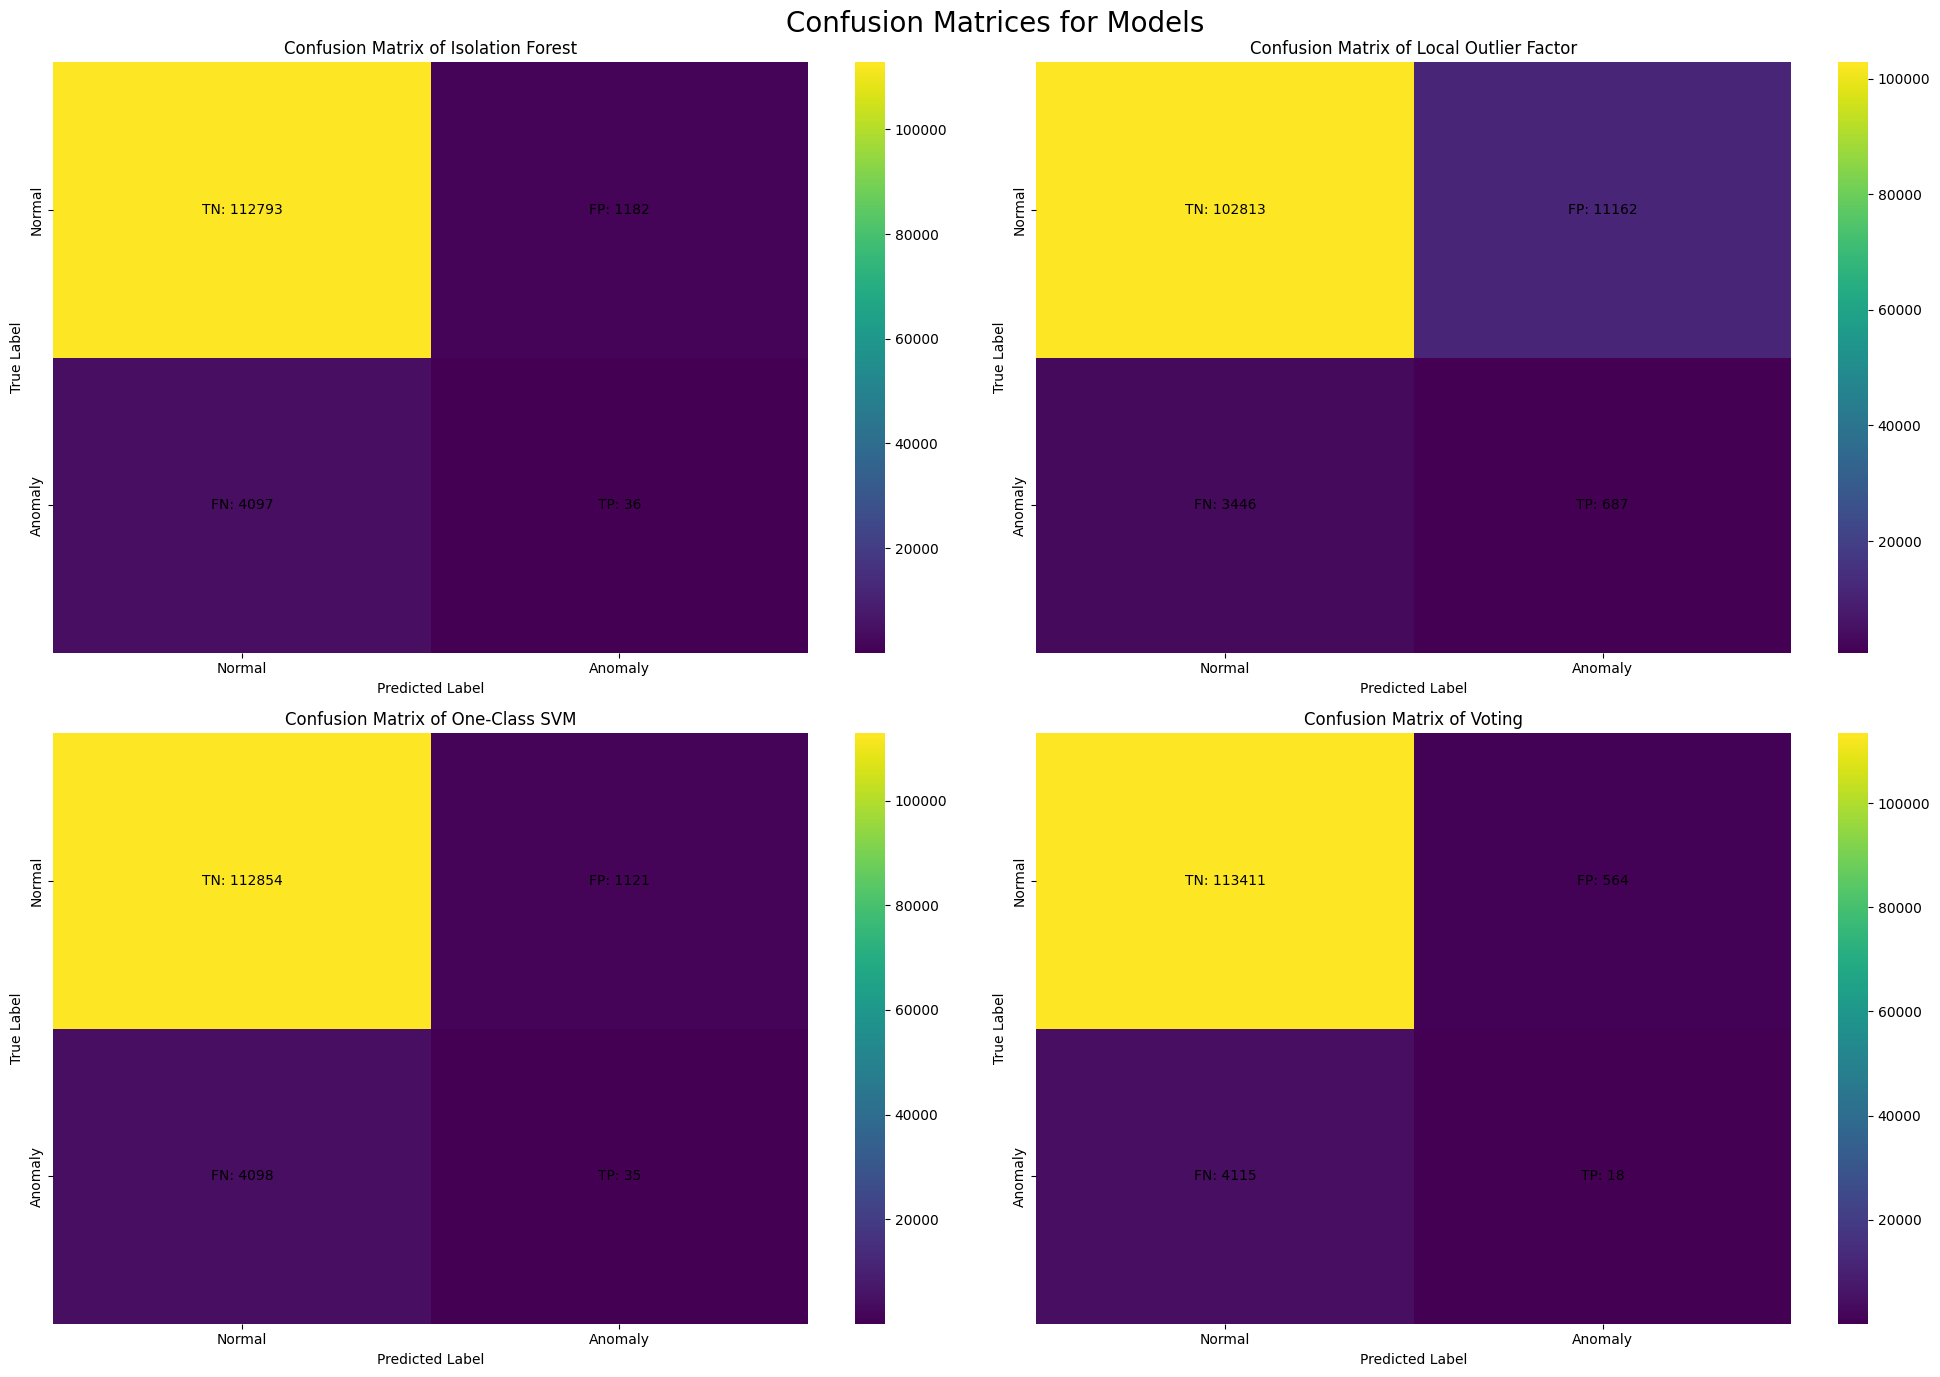

In [15]:
# Create a new figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot the Confusion Matrix for each model
eval.plot_4_cm(axs[0, 0], if_cm, 'Isolation Forest')
eval.plot_4_cm(axs[0, 1], lof_cm, 'Local Outlier Factor')
eval.plot_4_cm(axs[1, 0], ocsvm_cm, 'One-Class SVM')
eval.plot_4_cm(axs[1, 1], vote_cm, 'Voting')

# Add a title to the figure
fig.suptitle('Confusion Matrices for Models', fontsize=20)

plt.tight_layout()
plt.show()

## Classification Reports

In [16]:
# Print the classification reports

eval.print_classreport(y_test, if_pred, 'Isolation Forest')
eval.print_classreport(y_test, lof_pred, 'Local Outlier Factor')
eval.print_classreport(y_test, ocsvm_pred, 'One-Class SVM')
eval.print_classreport(y_test, vote_pred, 'Voting Ensemble')

Classification Report for Isolation Forest:

              precision    recall  f1-score   support

          -1       0.03      0.01      0.01      4133
           1       0.96      0.99      0.98    113975

    accuracy                           0.96    118108
   macro avg       0.50      0.50      0.50    118108
weighted avg       0.93      0.96      0.94    118108



Classification Report for Local Outlier Factor:

              precision    recall  f1-score   support

          -1       0.06      0.17      0.09      4133
           1       0.97      0.90      0.93    113975

    accuracy                           0.88    118108
   macro avg       0.51      0.53      0.51    118108
weighted avg       0.94      0.88      0.90    118108



Classification Report for One-Class SVM:

              precision    recall  f1-score   support

          -1       0.03      0.01      0.01      4133
           1       0.96      0.99      0.98    113975

    accuracy                           0.9

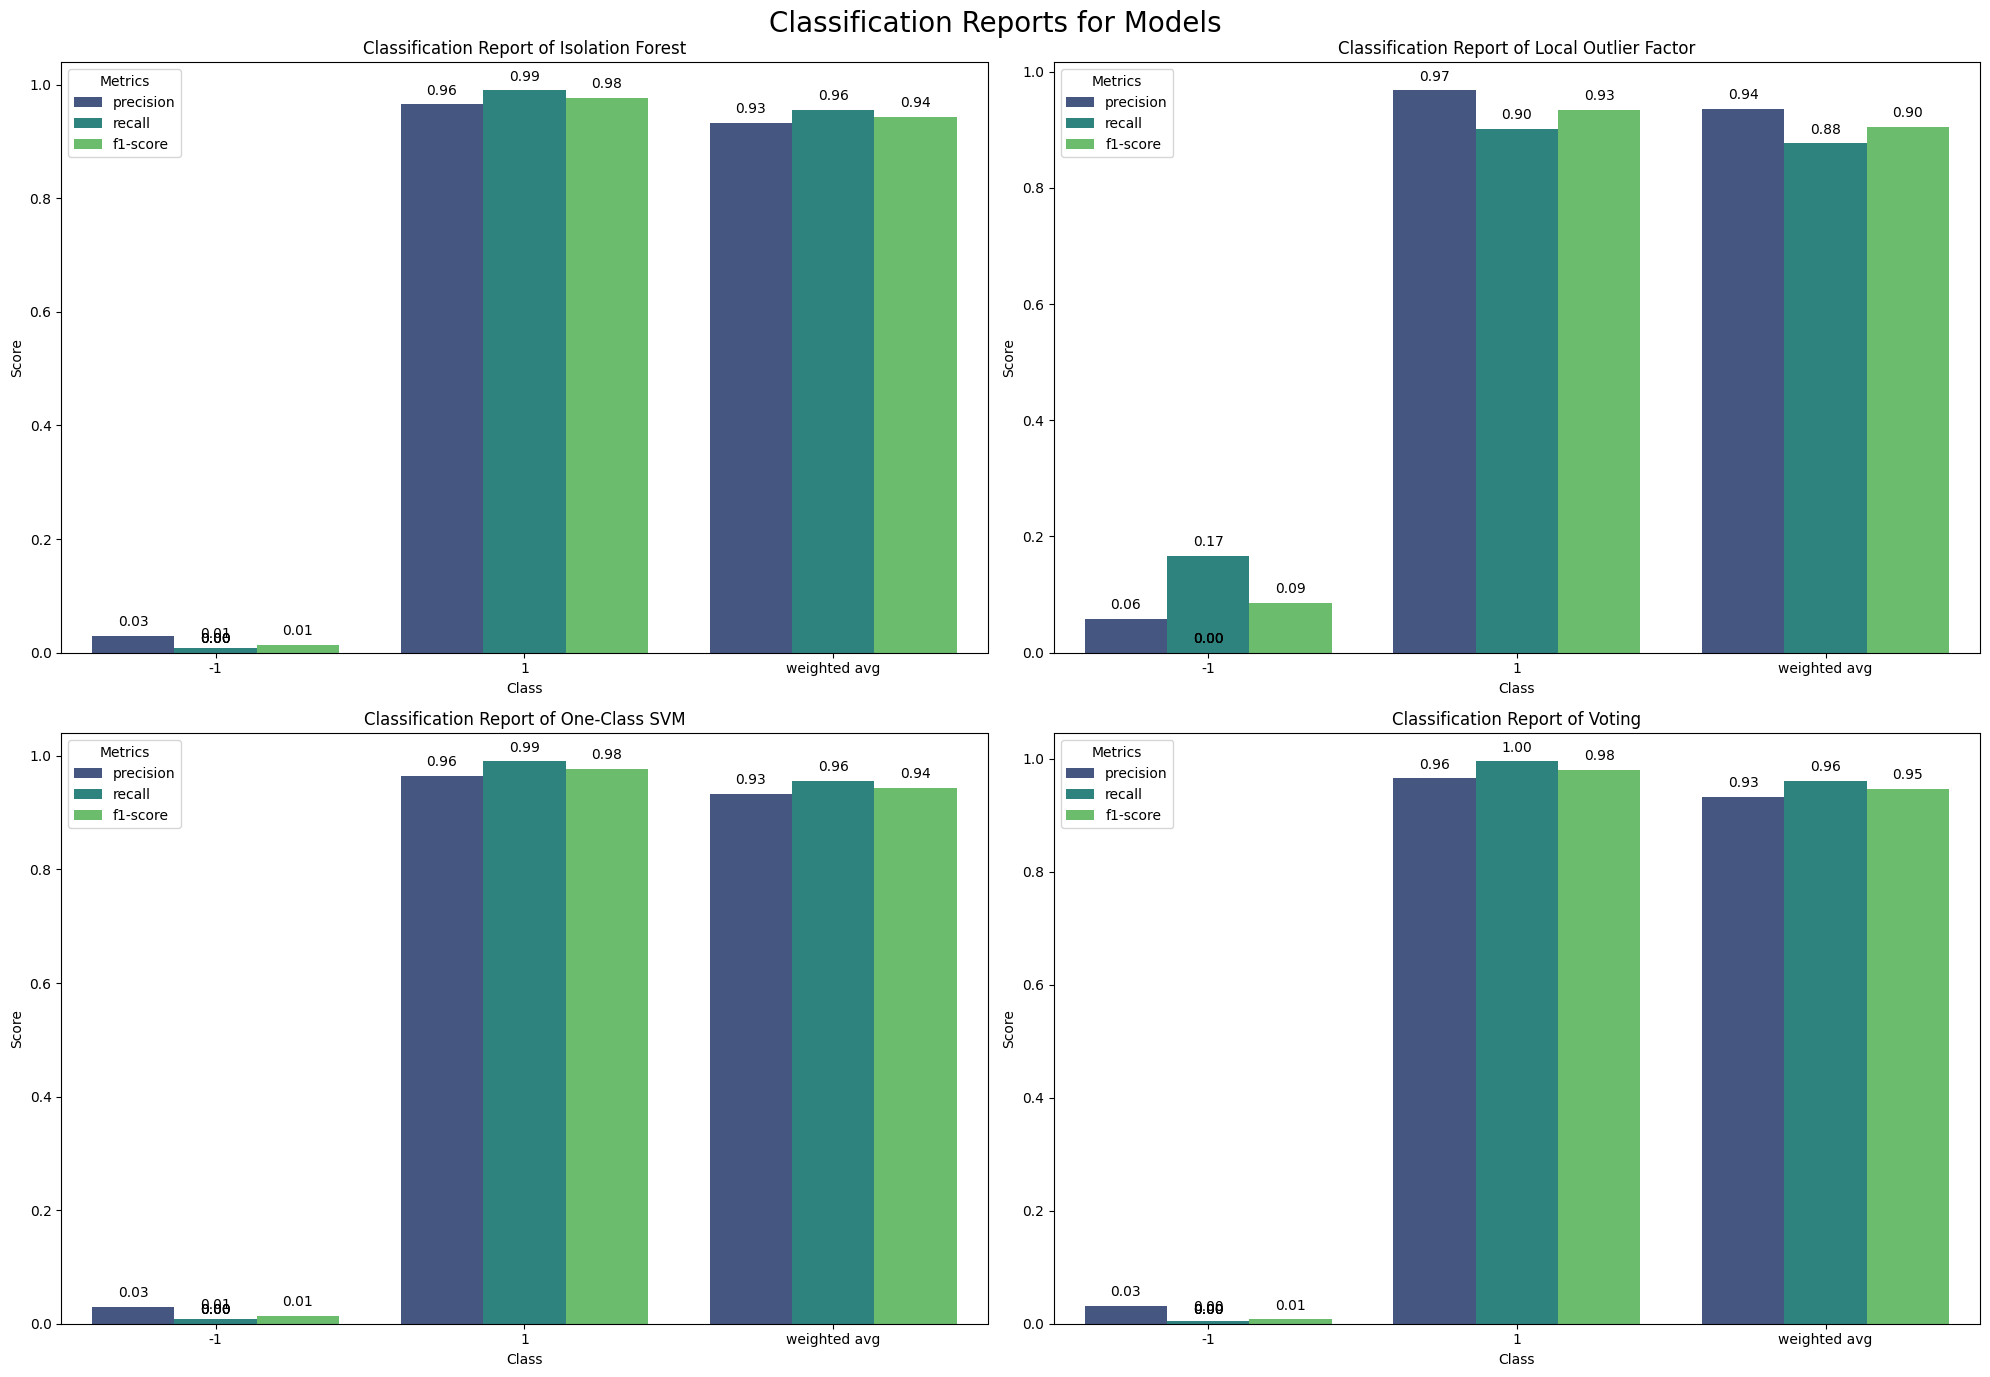

In [17]:
# Plot the classification reports

# Create a new figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot the Classification Report for each model
eval.plot_4_classreport(axs[0, 0], y_test, if_pred, 'Isolation Forest')
eval.plot_4_classreport(axs[0, 1], y_test, lof_pred, 'Local Outlier Factor')
eval.plot_4_classreport(axs[1, 0], y_test, ocsvm_pred, 'One-Class SVM')
eval.plot_4_classreport(axs[1, 1], y_test, vote_pred, 'Voting')

# Add a title to the figure
fig.suptitle('Classification Reports for Models', fontsize=20)

plt.tight_layout()
plt.show()

## Metrics

In [18]:
# Print the metrics for each model

# Isolation Forest
if_metrics = eval.get_metrics(if_cm, y_test, if_pred)
eval.print_metrics(if_metrics, 'Isolation Forest')

# Local Outlier Factor
lof_metrics = eval.get_metrics(lof_cm, y_test, lof_pred)
eval.print_metrics(lof_metrics, 'Local Outlier Factor')

# One-Class SVM
ocsvm_metrics = eval.get_metrics(ocsvm_cm, y_test, ocsvm_pred)
eval.print_metrics(ocsvm_metrics, 'One-Class SVM')

# Voting Ensemble
vote_metrics = eval.get_metrics(vote_cm, y_test, vote_pred)
eval.print_metrics(vote_metrics, 'Voting Ensemble')

Metrics of Isolation Forest:

Recall: 0.0087
Precision: 0.0296
F1 Score: 0.0135
PR AUC: 0.0349
AU ROC: 0.4992
Specificity: 0.9896


Metrics of Local Outlier Factor:

Recall: 0.1662
Precision: 0.058
F1 Score: 0.086
PR AUC: 0.0388
AU ROC: 0.5341
Specificity: 0.9021


Metrics of One-Class SVM:

Recall: 0.0085
Precision: 0.0303
F1 Score: 0.0132
PR AUC: 0.035
AU ROC: 0.4993
Specificity: 0.9902


Metrics of Voting Ensemble:

Recall: 0.0044
Precision: 0.0309
F1 Score: 0.0076
PR AUC: 0.035
AU ROC: 0.4997
Specificity: 0.9951




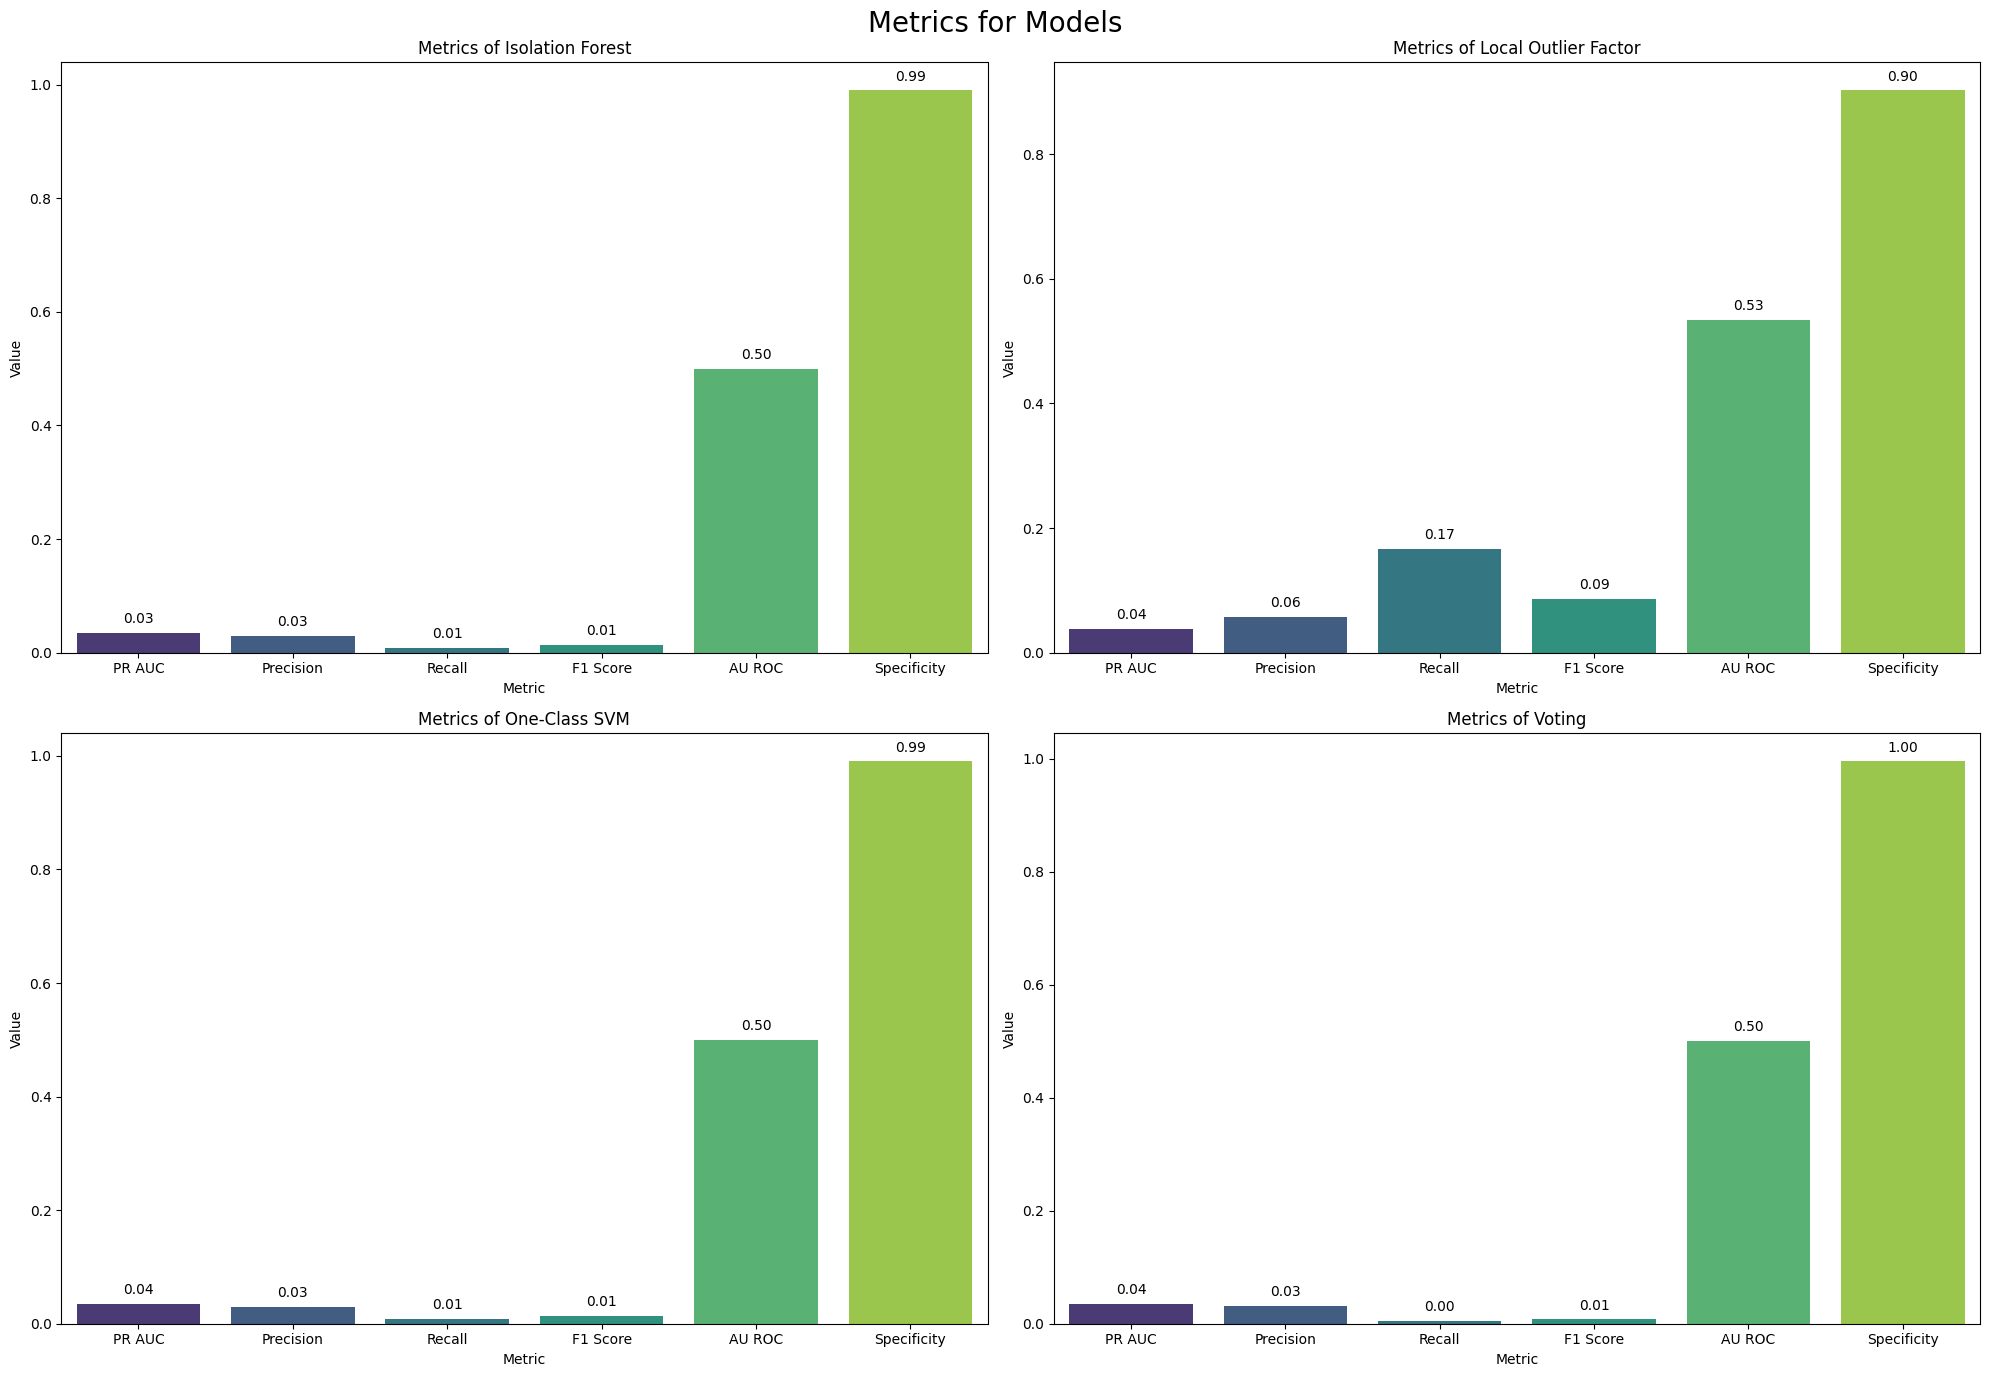

In [19]:
# Plot Metrics

# Create a new figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot the metrics for each model
eval.plot_4_metrics(axs[0, 0], if_metrics, 'Isolation Forest')
eval.plot_4_metrics(axs[0, 1], lof_metrics, 'Local Outlier Factor')
eval.plot_4_metrics(axs[1, 0], ocsvm_metrics, 'One-Class SVM')
eval.plot_4_metrics(axs[1, 1], vote_metrics, 'Voting')

# Add a title to the figure
fig.suptitle('Metrics for Models', fontsize=20)

plt.tight_layout()
plt.show()

## Anomaly Analysis

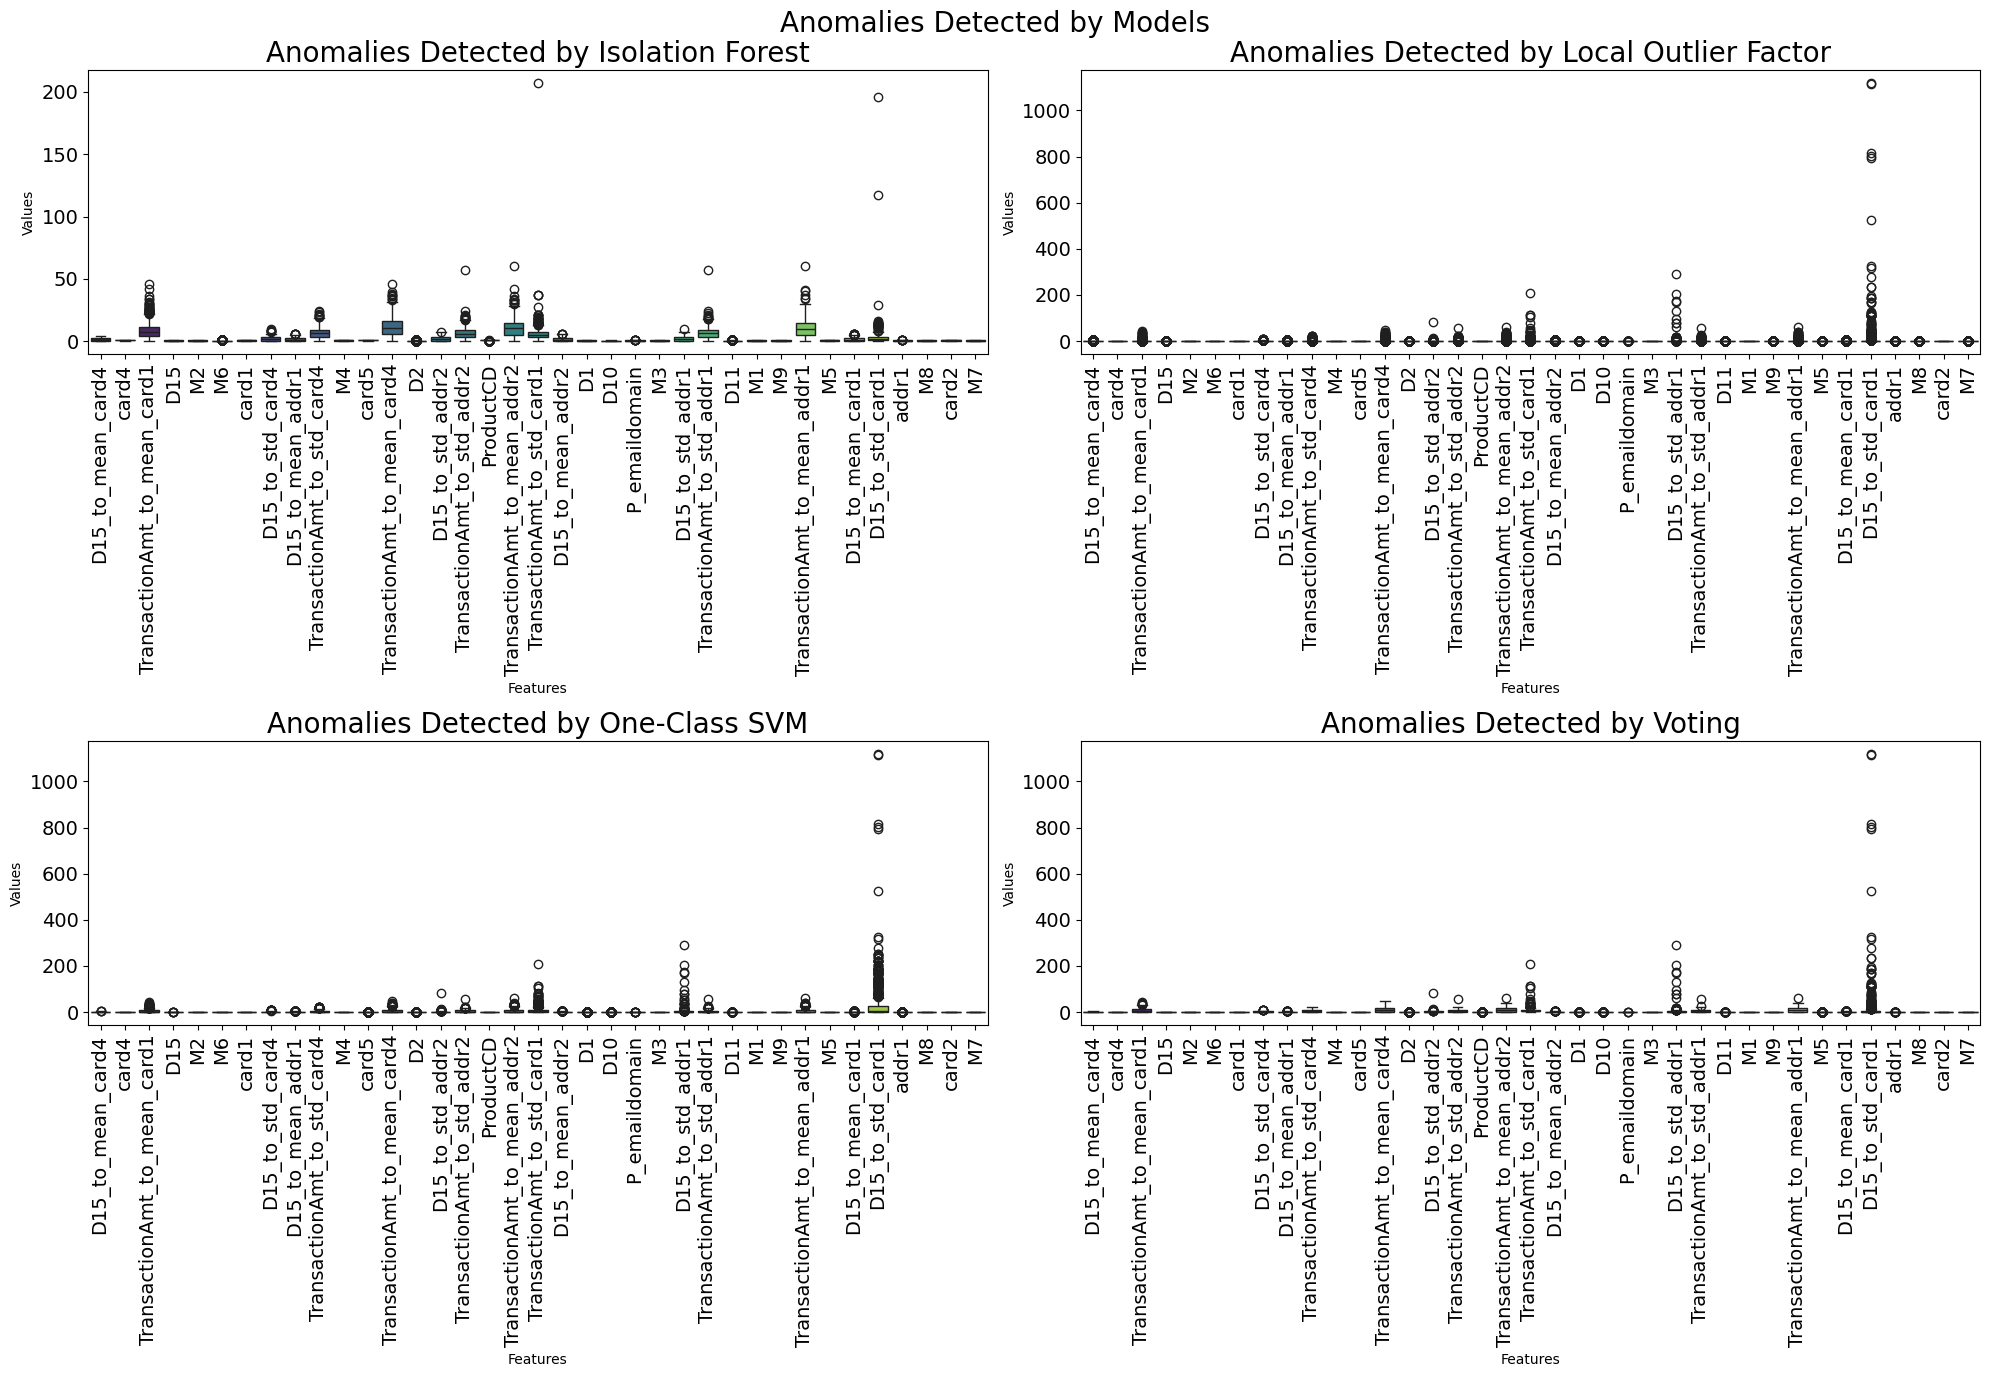

In [20]:
# Get anomalies detected by each model
if_anomalies = X_test[if_pred == -1]
lof_anomalies = X_test[lof_pred == -1]
ocsvm_anomalies = X_test[ocsvm_pred == -1]
vote_anomalies = X_test[vote_pred == -1]

# Get the labels from X_test_df
labels = X_test_df.columns.tolist()

# Create a new figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot the anomalies for each model
eval.plot_4_anomalies(axs[0, 0], labels, if_anomalies, 'Isolation Forest')
eval.plot_4_anomalies(axs[0, 1], labels, lof_anomalies, 'Local Outlier Factor')
eval.plot_4_anomalies(axs[1, 0], labels, ocsvm_anomalies, 'One-Class SVM')
eval.plot_4_anomalies(axs[1, 1], labels, vote_anomalies, 'Voting')

# Add a title to the figure
fig.suptitle('Anomalies Detected by Models', fontsize=20)

plt.tight_layout()
plt.show()

# Analysis and Evaluation

In this project, we evaluated four different models for anomaly detection: Isolation Forest, Local Outlier Factor (LOF), One-Class SVM, and a Voting Ensemble. We used several metrics to evaluate the performance of these models, including recall, precision, F1 score, PR AUC, AU ROC, and specificity.

- Isolation Forest
The Isolation Forest model had a recall of 0.0082, indicating that it was able to correctly identify about 0.82% of the actual anomalies. The precision was 0.0287, meaning that about 2.87% of the instances that the model identified as anomalies were actually anomalies. The F1 score, which is the harmonic mean of precision and recall, was 0.0128. The PR AUC and AU ROC, which measure the trade-off between true positive rate and false positive rate, were 0.0349 and 0.4991 respectively. The specificity, which measures the proportion of actual negatives that are correctly identified, was 0.9899.

- Local Outlier Factor
The LOF model had a higher recall of 0.1662, but a lower precision of 0.058. The F1 score was 0.086. The PR AUC and AU ROC were 0.0388 and 0.5342 respectively. The specificity was 0.9021.

- One-Class SVM
The One-Class SVM model had similar performance to the Isolation Forest model, with a recall of 0.0085, precision of 0.0303, and F1 score of 0.0132. The PR AUC and AU ROC were 0.035 and 0.4993 respectively. The specificity was 0.9902.

- Voting Ensemble
The Voting Ensemble model had the lowest recall of 0.0041, but a slightly higher precision of 0.029. The F1 score was 0.0072. The PR AUC and AU ROC were both 0.035. The specificity was the highest among all models at 0.995.

In conclusion, all models had relatively low recall, indicating that they were not very effective at identifying the actual anomalies. The precision was also low, indicating that many of the instances that the models identified as anomalies were not actual anomalies. The F1 scores were also low, indicating that the models were not very effective overall. The PR AUC and AU ROC scores were also low, indicating that the models were not very effective at distinguishing between anomalies and non-anomalies. The specificity was relatively high for all models, indicating that they were effective at identifying the non-anomalies. However, in the context of anomaly detection, it is often more important to correctly identify the anomalies, so the low recall and precision are concerning. Further work is needed to improve the performance of these models.